# Determinant

In [3]:
import numpy as np
import matplotlib.pyplot as plt

## Linearly independent matrix determinant

In [4]:
A = np.random.randn(2, 2)

print(A)
print(np.linalg.det(A))

[[ 0.66506226 -0.44169975]
 [-0.54624859  0.84358644]]
0.31975963729005014


## Linearly dependent matrix determinant

In [5]:
A = np.array([
    [1, 3],
    [1, 3]
])

print(A)
print(np.linalg.det(A))

[[1 3]
 [1 3]]
0.0


## Rank and determinant from a matrix with linearly dependent set

In [9]:
m = 3
A = np.random.randn(m, m)

# Impose linear dependency
A[:, 0] = A[:, 1]

print('Matrix')
print(np.round(A, 1))
print()
print(f'Rank: {np.linalg.matrix_rank(A)}')
print('Rank is not full-rank, because of linear dependency')
print()
print(f'Determinant: {np.linalg.det(A)}')
print('Determinant is 0 because of linear dependency')

Matrix
[[ 0.7  0.7 -0.6]
 [-0.8 -0.8 -0.6]
 [ 1.1  1.1 -0.4]]

Rank: 2
Rank is not full-rank, because of linear dependency

Determinant: -1.0371662519785668e-16
Determinant is 0 because of linear dependency


## Swap rows effect on determinant

In [6]:
m = 6
A = np.random.randn(m, m)

print('A')
print(A.shape)
print(np.round(A, 1))
print()

print(f'Before row swap determinant: {np.linalg.det(A)}')
print()

# Swap row 0 and row 1
As = A[[1, 0, 2, 3, 4, 5], :]
print(f'After 1 row swap determinant: {np.linalg.det(As)}')
print('1 row swap flips the sign, but does not change the magnitude')
print()

# Swap row 3 and row 4
Ass = A[[1, 0, 2, 4, 3, 5], :]
print(f'After 2 row swaps determinant: {np.linalg.det(Ass)}')
print('2 row swaps turn the sign back to the original')

A
(6, 6)
[[ 0.7  1.4 -0.3  1.   0.7  0.1]
 [ 0.3  0.3 -0.   0.1 -0.1  0.3]
 [ 0.8 -0.1  2.9  1.  -1.8  0.2]
 [-1.5  0.5 -0.2 -1.2  0.4 -0.6]
 [-1.1 -1.6  1.5  0.8 -1.6 -0.1]
 [-2.  -0.9  0.3 -0.7 -1.7 -0.5]]

Before row swap determinant: 3.0245933712182347

After 1 row swap determinant: -3.0245933712182347
1 row swap flips the sign, but does not change the magnitude

After 2 row swaps determinant: 3.0245933712182347
2 row swaps turn the sign back to the original


## Shifting a linearly dependent matrix gradually and check determinant

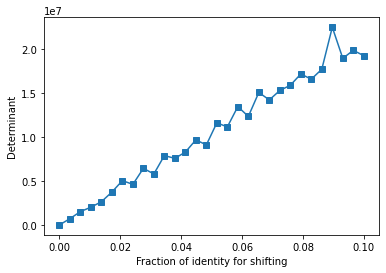

In [6]:
lambdas = np.linspace(0, .1, 30)

tmp = np.zeros(1000)
dets = np.zeros(len(lambdas))

for deti in range(len(lambdas)):
    
    for i in range(1000):
        
        M = np.random.randn(20, 20)
        
        # Impose a linear dependency
        M[:, 0] = M[:, 1]
        
        # Compute the magnitude of determinant of shifted linear dependent matrix
        tmp[i] = abs(np.linalg.det(M + lambdas[deti] * np.eye(20)))
        
    # Take average for each lambda
    dets[deti] = np.mean(tmp)
    
plt.plot(lambdas, dets, 's-')
plt.xlabel('Fraction of identity for shifting')
plt.ylabel('Determinant')
plt.show()

## det(AB) = det(A) * det(B)

In [15]:
m = 3

A = np.random.randn(m, m)
B = np.random.randn(m, m)
AB = A @ B

print(f'Determinant of A: {np.linalg.det(A):.3f}')
print(f'Determinant of B: {np.linalg.det(B):.3f}')
print(f'Determinant of det(A) * det(B): {np.linalg.det(A) * np.linalg.det(B):.3f}')
print(f'Determinant of det(AB): {np.linalg.det(AB):.3f}')

Determinant of A: 0.983
Determinant of B: -0.524
Determinant of det(A) * det(B): -0.515
Determinant of det(AB): -0.515


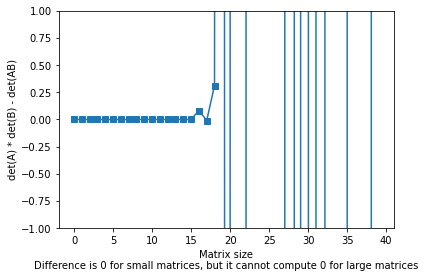

In [18]:
m = 40

dets = np.zeros((m, 2))

for k in range(m):
    A = np.random.randn(k, k)
    B = np.random.randn(k, k)
    AB = A @ B
    
    # det(A) * det(B)
    dets[k, 0] = np.linalg.det(A) * np.linalg.det(B)
    
    # det(AB)
    dets[k, 1] = np.linalg.det(AB)
    
# det(A) * det(B) - det(AB) should be theoretically 0, 
# but because of computer rounding error, it won't be zero for a large matrix
plt.plot(dets[:, 0] - dets[:, 1], 's-')
plt.ylim([-1, 1])
plt.xlabel('Matrix size\nDifference is 0 for small matrices, but it cannot compute 0 for large matrices')
plt.ylabel('det(A) * det(B) - det(AB)')
plt.show()